In [41]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Resizing, concatenate
from sklearn.manifold import TSNE

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('Training size', x_train.shape, x_train.max())
print('Testing size', x_test.shape, x_test.max())

Training size (60000, 28, 28, 1) 255
Testing size (10000, 28, 28, 1) 255


In [40]:
# create train groups
train_groups = [x_train[np.where(y_train == i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test == i)[0]] for i in np.unique(y_train)]
print('Training groups size', [x.shape[0] for x in train_groups])
print('Testing groups size', [x.shape[0] for x in test_groups])

Training groups size [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
Testing groups size [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [18]:
def gen_random_batch(in_groups, batch_halfsize=8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size=batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]

        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0] * batch_halfsize
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
    return np.stack(out_img_a, 0), np.stack(out_img_b, 0), np.stack(out_score, 0)

In [37]:
model = Sequential()

model.add(Resizing(224, 224))

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=2, activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

model.build((None, 28, 28, 1))
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (None, 224, 224, 1)       0         
                                                                 
 conv2d_71 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 conv2d_72 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_74 (Conv2D)          (None, 112, 112, 128)     147584    
                                                      

In [21]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
hist = model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)


Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5173 - accuracy: 0.8180 - val_loss: 0.3768 - val_accuracy: 0.8672
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3744 - accuracy: 0.8680 - val_loss: 0.3631 - val_accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3321 - accuracy: 0.8834 - val_loss: 0.3569 - val_accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3103 - accuracy: 0.8907 - val_loss: 0.3318 - val_accuracy: 0.8800
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2902 - accuracy: 0.8975 - val_loss: 0.2949 - val_accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2743 - accuracy: 0.9026 - val_loss: 0.2958 - val_accuracy: 0.8934
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2626 - accuracy: 0.9069 - val_loss: 0.2921 -

In [22]:
x_test_features = model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ImageA_Input (InputLayer)      [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 ImageB_Input (InputLayer)      [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 FeatureGenerationModel (Functi  (None, 10)          61706       ['ImageA_Input[0][0]',           
 onal)                                                            'ImageB_Input[0][0]']           
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['FeatureGeneratio

In [25]:
from sklearn.manifold import TSNE
x_test_features = model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

79/79 [==============================] - 2s 21ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10000 samples in 0.567s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000075
[t-SNE] Computed conditional probabilities in 0.790s


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Iteration 50: error = 75.4680939, gradient norm = 0.0086187 (50 iterations in 3.843s)
[t-SNE] Iteration 100: error = 69.0165863, gradient norm = 0.0040891 (50 iterations in 3.610s)
[t-SNE] Iteration 150: error = 66.1074753, gradient norm = 0.0027511 (50 iterations in 3.653s)
[t-SNE] Iteration 200: error = 64.4052505, gradient norm = 0.0021622 (50 iterations in 3.629s)
[t-SNE] Iteration 250: error = 63.2534790, gradient norm = 0.0017097 (50 iterations in 3.604s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.253479
[t-SNE] Iteration 300: error = 2.0970168, gradient norm = 0.0012782 (50 iterations in 3.760s)
[t-SNE] Iteration 350: error = 1.5391147, gradient norm = 0.0006426 (50 iterations in 3.761s)
[t-SNE] Iteration 400: error = 1.2320610, gradient norm = 0.0003884 (50 iterations in 3.845s)
[t-SNE] Iteration 450: error = 1.0512446, gradient norm = 0.0002655 (50 iterations in 3.904s)
[t-SNE] Iteration 500: error = 0.9342632, gradient norm = 0.0001943 (50 

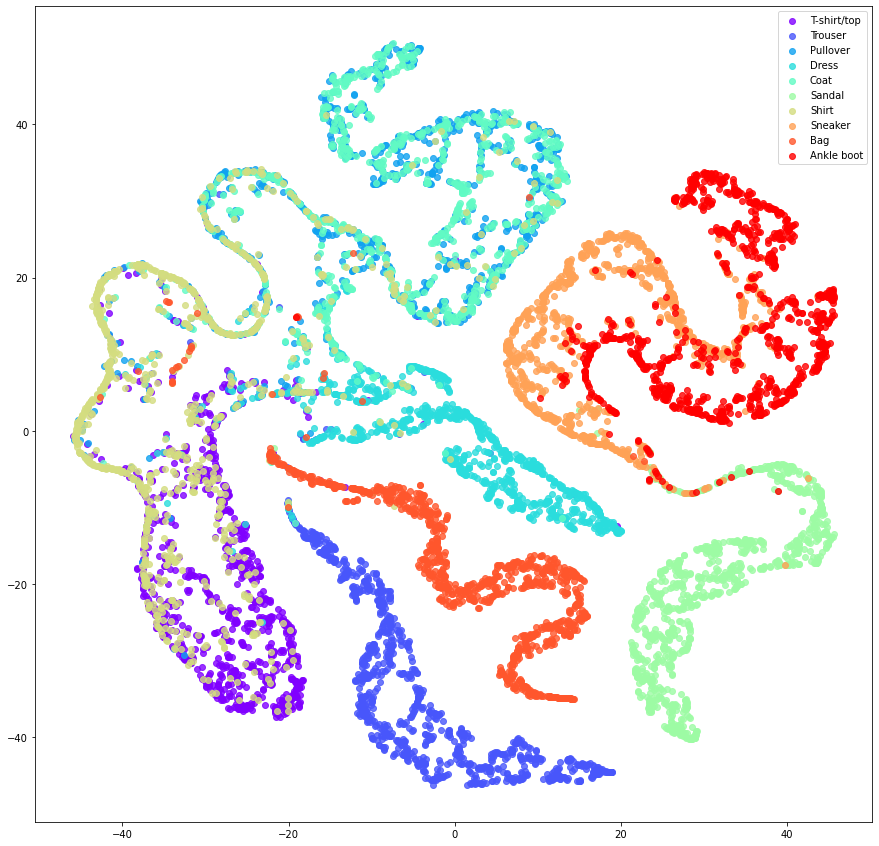

In [26]:
obj_categories = ['T-shirt/top','Trouser','Pullover','Dress',
 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))
for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
 plt.scatter(tsne_features[np.where(y_test == c_group), 0],
 tsne_features[np.where(y_test == c_group), 1],
 marker='o',
 color=c_color,
 linewidth='1',
 alpha=0.8,
 label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)